In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

In [2]:
files = {
    "cahya/distilbert-base-indonesian": "hasil_prediksi_clickbait_distilbert.csv",
    "google-bert/bert-base-multilingual-uncased": "hasil_prediksi_clickbait_mbert.csv",
    "indobenchmark/indobert-base-p1": "hasil_prediksi_clickbait_indobert.csv",
    "cahya/roberta-base-indonesian-522M": "hasil_prediksi_clickbait_roberta.csv"
}

result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])
result_table_pr = pd.DataFrame(columns=['classifiers', 'precision', 'recall', 'average_precision'])

In [3]:
for label, path in files.items():
    df = pd.read_csv(path)

    actual = df['label_score']
    probs = df['probabilitas']

    fpr, tpr, _ = roc_curve(actual, probs)
    roc_auc = auc(fpr, tpr)

    result_table = pd.concat([
        result_table,
        pd.DataFrame({
            'classifiers': [label],
            'fpr': [fpr],
            'tpr': [tpr],
            'auc': [roc_auc]
        })
    ], ignore_index=True)

    precision, recall, _ = precision_recall_curve(actual, probs)
    ap_score = average_precision_score(actual, probs)

    result_table_pr = pd.concat([
        result_table_pr,
        pd.DataFrame({
            'classifiers': [label],
            'precision': [precision],
            'recall': [recall],
            'average_precision': [ap_score]
        })
    ], ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18332\3733597869.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_table = pd.concat([
C:\Users\HP\AppData\Local\Temp\ipykernel_18332\3733597869.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_table_pr = pd.concat([


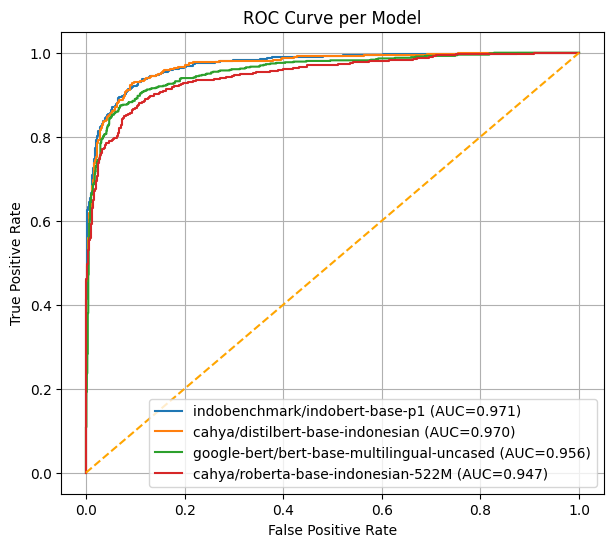

In [4]:
result_table_sorted = result_table.sort_values(by='auc', ascending=False).reset_index(drop=True)

plt.figure(figsize=(7,6))

for i in range(len(result_table_sorted)):
    plt.plot(result_table_sorted.loc[i]['fpr'],
             result_table_sorted.loc[i]['tpr'],
             label=f"{result_table_sorted.loc[i]['classifiers']} (AUC={result_table_sorted.loc[i]['auc']:.3f})")

plt.plot([0,1], [0,1], linestyle='--', color='orange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve per Model')
plt.legend()
plt.grid(True)
plt.show()

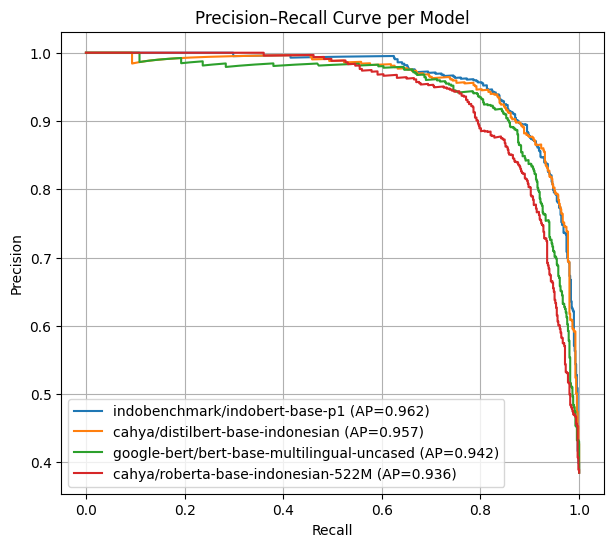

In [5]:
result_table_pr_sorted = result_table_pr.sort_values(by='average_precision', ascending=False).reset_index(drop=True)

plt.figure(figsize=(7,6))
for i in range(len(result_table_pr_sorted)):
    plt.plot(result_table_pr_sorted.loc[i]['recall'],
             result_table_pr_sorted.loc[i]['precision'],
             label=f"{result_table_pr_sorted.loc[i]['classifiers']} (AP={result_table_pr_sorted.loc[i]['average_precision']:.3f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve per Model')
plt.legend()
plt.grid(True)
plt.show()